In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [8]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    num_sample, num_feature = data.shape
    return data[np.random.choice(num_sample,k)]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [25]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    num_cluster, _ = mu.shape
    distances = []
    for k in range(num_cluster):
        distance = np.sum(np.square(data - mu[k,:]), axis=1)
        distances.append(distance)
    return np.array(np.transpose(distances))

#### Update k-means parameters

In [27]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    _, num_features = data.shape
    num_cluster, _ = mu_old.shape
    distance = build_distance_matrix(data, mu_old)
    losses   = np.min(distance, axis=1)
    assignments = np.argmin(distance, axis=1)
    
    mu = np.empty((num_cluster,num_features))
    for k in range(num_cluster):
        rows = np.where(assignments == k)
        mu[k,:] = np.mean(np.squeeze(data[rows,:]),axis=0)
    return losses,assignments, np.nan_to_num(mu)
    

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 229.75754450367646.


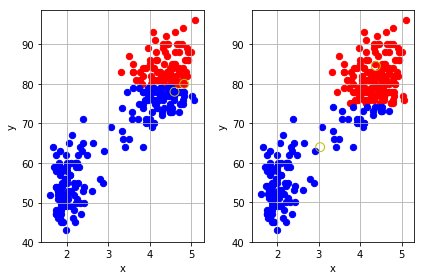

The current iteration of k-means is: 1,                the average loss is 66.09943233237557.


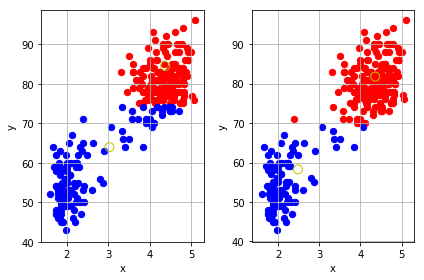

The current iteration of k-means is: 2,                the average loss is 38.08245757697684.


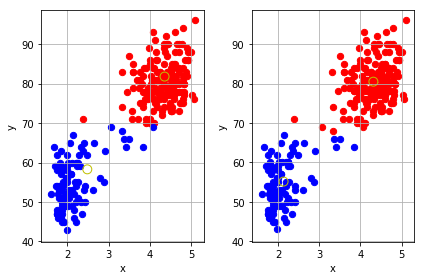

The current iteration of k-means is: 3,                the average loss is 32.81512971023836.


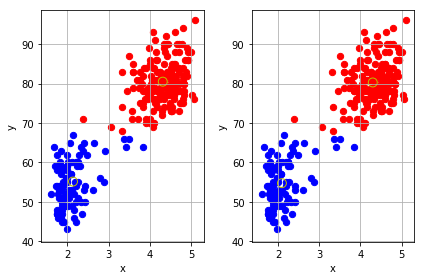

The current iteration of k-means is: 4,                the average loss is 32.72709088583533.


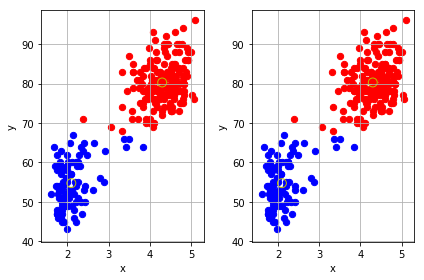

The current iteration of k-means is: 5,                the average loss is 32.72709088583533.


In [30]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [31]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [33]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape((original_image.shape[0] * original_image.shape[1], 3))
    
    return processed_image.astype(float)

processed_image = preprocess_image(original_image)

The current iteration of k-means is: 0,                the average loss is 2680.2794661458333.
The current iteration of k-means is: 1,                the average loss is 2064.2502469725846.
The current iteration of k-means is: 2,                the average loss is 1948.1432202330047.
The current iteration of k-means is: 3,                the average loss is 1897.8166539150766.
The current iteration of k-means is: 4,                the average loss is 1872.0488996827094.
The current iteration of k-means is: 5,                the average loss is 1856.9699917384428.
The current iteration of k-means is: 6,                the average loss is 1846.2174440156666.
The current iteration of k-means is: 7,                the average loss is 1835.8151672914155.
The current iteration of k-means is: 8,                the average loss is 1823.0645730526473.
The current iteration of k-means is: 9,                the average loss is 1803.304100244574.
The current iteration of k-means is: 10,           

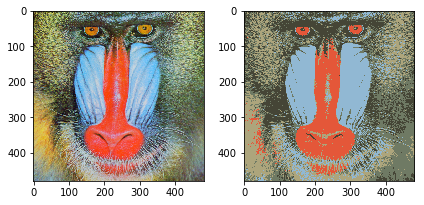

In [38]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update k-means information.
        mu_old = mu
        
    plot_image_compression(original_image, processed_image, assignments, mu, k)
    return mu, assignments
    
# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
mu, assignments  = kmean_compression(original_image, processed_image, k, max_iter, threshold)

In [39]:
mu

array([[  69.59531515,   69.48642335,   54.15747626],
       [ 173.59961173,  165.786044  ,  124.51788179],
       [ 111.4039566 ,  122.02905233,  100.71035418],
       [ 145.39804408,  184.78713626,  211.15997996],
       [ 228.80414771,   87.35790461,   57.04286657]])

In [41]:
assignments.shape

(230400,)